SETUP 

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt   
import shutil   
import geopandas as gpd
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



Carregamento dos dados de treino

In [2]:
file_path = 'cars_train.csv'


In [3]:
cars_train = pd.read_csv(file_path, encoding = "utf-16", delimiter = '\t' )

Foi necessário usar o delimitador como '\t' por conta da origem do dataset

In [4]:
cars_train

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021.0,8150.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.289616
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020.0,17987.0,Automática,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.080497
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019.0,44742.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.648664
29582,208909739337040262669325459666578363437,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022.0,35376.0,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,68495.990693


Carregamento dos dados de teste - sem a coluna 'preco'

In [5]:
cars_test = pd.read_csv('cars_test.csv', encoding = "utf-16", delimiter ='\t')
cars_test

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.0,20258.0,Manual,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.0,53045.0,Manual,2,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.0,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.0,32486.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.0,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.0,24937.0,Automática,4,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.0,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.0,62074.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,270530958308663978454359593206239054667,8.0,TOYOTA,COROLLA,1.8 GLI UPPER 16V FLEX 4P AUTOMÁTICO,2017,2018.0,44943.0,CVT,4,...,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
9858,35444226755331218706378362485070904721,17.0,TOYOTA,HILUX,2.8 SRV 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2017,2017.0,44316.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9859,151927592621490440610866139377092833936,8.0,CHEVROLET,TRACKER,1.0 TURBO FLEX LT AUTOMÁTICO,2020,2021.0,21587.0,Automática,4,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,NaN,Garantia de fábrica,NaN,NaN
9860,118047837484645467440786911677256539035,9.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2018,2018.0,54084.0,Automática,4,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


Análise exploratória dos dados


## 1 Verificando dados ausentes no conjunto de treino

In [6]:
cars_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [7]:
cars_train['num_fotos'] = cars_train['num_fotos'].fillna(0)

In [8]:
cars_train['num_fotos'].isnull().sum()

0

Podemos calcular a porcentagem desses dados ausentes:

In [9]:
cars_train.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
      dtype='object')

In [10]:
cars_train.shape

(29584, 29)

Ano do modelo do veículo está na forma de float64, como não temos anos na forma de ponto flutuante mudarei para int64

In [11]:
cars_train['ano_modelo'] = cars_train['ano_modelo'].astype(int)

In [12]:
cars_train['ano_modelo'].dtypes

dtype('int64')

In [13]:
cars_train['dono_aceita_troca']

0                 NaN
1        Aceita troca
2        Aceita troca
3        Aceita troca
4                 NaN
             ...     
29579    Aceita troca
29580             NaN
29581    Aceita troca
29582    Aceita troca
29583    Aceita troca
Name: dono_aceita_troca, Length: 29584, dtype: object

In [14]:
cars_train['dono_aceita_troca'].value_counts()

dono_aceita_troca
Aceita troca    21922
Name: count, dtype: int64

In [15]:
total_cells = np.product(cars_train.shape) # faz a multiplicacao de cada feature usando a dimensao do df
total_missing_values = cars_train.isnull().sum().sum() # conta os dados ausentes
#percent of missing data
percent = (total_missing_values/total_cells) * 100
print(percent)

17.40397885156935


#### Isso nos mostra que aproximadamente 17% do dataset original tem dados NaN

Analisando a porcentagem por colunas, temos :

In [16]:
missing_percentage = cars_train.isnull().mean() * 100
print(missing_percentage)

id                           0.000000
num_fotos                    0.000000
marca                        0.000000
modelo                       0.000000
versao                       0.000000
ano_de_fabricacao            0.000000
ano_modelo                   0.000000
hodometro                    0.000000
cambio                       0.000000
num_portas                   0.000000
tipo                         0.000000
blindado                     0.000000
cor                          0.000000
tipo_vendedor                0.000000
cidade_vendedor              0.000000
estado_vendedor              0.000000
anunciante                   0.000000
entrega_delivery             0.000000
troca                        0.000000
elegivel_revisao             0.000000
dono_aceita_troca           25.899135
veiculo_único_dono          64.768118
revisoes_concessionaria     68.996755
ipva_pago                   33.548540
veiculo_licenciado          46.234451
garantia_de_fábrica         85.245403
revisoes_den

A coluna 'dono_aceita_troca' contem 21922 linhas preenchidas com 'aceita troca' de um total de 29584.
Dessa forma temos 7662 linhas não preenchidas. Podemos por exemplo, colocar a string 'Não aceita troca' nos valores NaN

In [17]:
cars_train['dono_aceita_troca'] = cars_train['dono_aceita_troca'].fillna('Não aceita troca')


In [18]:
cars_train['dono_aceita_troca']

0        Não aceita troca
1            Aceita troca
2            Aceita troca
3            Aceita troca
4        Não aceita troca
               ...       
29579        Aceita troca
29580    Não aceita troca
29581        Aceita troca
29582        Aceita troca
29583        Aceita troca
Name: dono_aceita_troca, Length: 29584, dtype: object

In [19]:
cars_train['dono_aceita_troca'].isnull().sum()

0

In [20]:
cars_train.shape

(29584, 29)

In [21]:
cars_train['veiculo_alienado'].isnull().sum() 

29584

Analisando a coluna 'veiculo_único_dono' com maiores valores NaN:

In [22]:
cars_train['veiculo_único_dono'].isnull().sum()

19161

In [23]:
cars_train['veiculo_único_dono'].value_counts()

veiculo_único_dono
Único dono    10423
Name: count, dtype: int64

Uma vez que o único valor informado na coluna 'veiculo_unico_dono' é a string 'único dono' pode-se inferir que as 19161 linhas com NaN são de carros que não possuíram o veículo como único dono

In [24]:
cars_train['veiculo_único_dono'] = cars_train['veiculo_único_dono'].fillna('Mais que um dono')

In [25]:
cars_train['veiculo_único_dono']

0        Mais que um dono
1        Mais que um dono
2        Mais que um dono
3        Mais que um dono
4        Mais que um dono
               ...       
29579          Único dono
29580          Único dono
29581    Mais que um dono
29582          Único dono
29583    Mais que um dono
Name: veiculo_único_dono, Length: 29584, dtype: object

In [26]:
cars_train['veiculo_único_dono'].isnull().sum()

0

Analisando a coluna 'revisoes_concessionaria'

In [27]:
cars_train['revisoes_concessionaria'].value_counts()

revisoes_concessionaria
Todas as revisões feitas pela concessionária    9172
Name: count, dtype: int64

In [28]:
cars_train['revisoes_concessionaria'].isnull().sum()

20412

Os carros que não apresentarem 'Todas as revisões feitas pela concessionária' significa que fizeram uma ou mais revisões em outro lugar. Como mostrado acima, cerca de 68% dos dados da coluna.

In [29]:
cars_train['revisoes_concessionaria'] = cars_train['revisoes_concessionaria'].fillna('Nem toda revisão foi feita em concessionária')
cars_train['revisoes_concessionaria']

0        Todas as revisões feitas pela concessionária
1        Nem toda revisão foi feita em concessionária
2        Nem toda revisão foi feita em concessionária
3        Nem toda revisão foi feita em concessionária
4        Todas as revisões feitas pela concessionária
                             ...                     
29579    Nem toda revisão foi feita em concessionária
29580    Todas as revisões feitas pela concessionária
29581    Nem toda revisão foi feita em concessionária
29582    Nem toda revisão foi feita em concessionária
29583    Nem toda revisão foi feita em concessionária
Name: revisoes_concessionaria, Length: 29584, dtype: object

In [30]:
cars_train['revisoes_concessionaria'].isnull().sum()

0

Analisando a coluna ipva_pago

In [31]:
cars_train['ipva_pago']

0        IPVA pago
1        IPVA pago
2              NaN
3        IPVA pago
4              NaN
           ...    
29579    IPVA pago
29580    IPVA pago
29581          NaN
29582    IPVA pago
29583          NaN
Name: ipva_pago, Length: 29584, dtype: object

O raciocínio usado aqui é que se o IPVA não foi pago, ele pode não ter sido pago ou não foi informado

In [32]:
cars_train['ipva_pago'] = cars_train['ipva_pago'].fillna('IPVA não foi pago ou não foi inforado')
cars_train['ipva_pago']

0                                    IPVA pago
1                                    IPVA pago
2        IPVA não foi pago ou não foi inforado
3                                    IPVA pago
4        IPVA não foi pago ou não foi inforado
                         ...                  
29579                                IPVA pago
29580                                IPVA pago
29581    IPVA não foi pago ou não foi inforado
29582                                IPVA pago
29583    IPVA não foi pago ou não foi inforado
Name: ipva_pago, Length: 29584, dtype: object

In [33]:
cars_train['ipva_pago'].isnull().sum()

0

Analisando a coluna 'veiculo_licenciado'

In [34]:
cars_train['veiculo_licenciado']

0        Licenciado
1               NaN
2               NaN
3        Licenciado
4               NaN
            ...    
29579    Licenciado
29580    Licenciado
29581           NaN
29582    Licenciado
29583           NaN
Name: veiculo_licenciado, Length: 29584, dtype: object

In [35]:
cars_train['veiculo_licenciado'].value_counts()

veiculo_licenciado
Licenciado    15906
Name: count, dtype: int64

In [36]:
cars_train['veiculo_licenciado'].isnull().sum()

13678

Se o veículo não tem licenciamento ele está ilegal perante a sociedade

In [37]:
cars_train['veiculo_licenciado'] = cars_train['veiculo_licenciado'].fillna('Sem licenciamento')

In [38]:
cars_train['veiculo_licenciado'].value_counts()

veiculo_licenciado
Licenciado           15906
Sem licenciamento    13678
Name: count, dtype: int64

Analisando a coluna garantia_de_fábrica

In [39]:
cars_train['garantia_de_fábrica']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4        Garantia de fábrica
                ...         
29579    Garantia de fábrica
29580    Garantia de fábrica
29581                    NaN
29582                    NaN
29583                    NaN
Name: garantia_de_fábrica, Length: 29584, dtype: object

In [40]:
cars_train['garantia_de_fábrica'].isnull().sum()

25219

In [41]:
cars_train['garantia_de_fábrica'] = cars_train['garantia_de_fábrica'].fillna('Sem garantia de fábrica')
cars_train['garantia_de_fábrica']

0        Sem garantia de fábrica
1        Sem garantia de fábrica
2        Sem garantia de fábrica
3        Sem garantia de fábrica
4            Garantia de fábrica
                  ...           
29579        Garantia de fábrica
29580        Garantia de fábrica
29581    Sem garantia de fábrica
29582    Sem garantia de fábrica
29583    Sem garantia de fábrica
Name: garantia_de_fábrica, Length: 29584, dtype: object

In [42]:
cars_train['garantia_de_fábrica'].value_counts()

garantia_de_fábrica
Sem garantia de fábrica    25219
Garantia de fábrica         4365
Name: count, dtype: int64

Analisando a coluna revisoes_dentro_agenda

In [43]:
cars_train['revisoes_dentro_agenda'].value_counts()

revisoes_dentro_agenda
Todas as revisões feitas pela agenda do carro    5910
Name: count, dtype: int64

In [44]:
cars_train['revisoes_dentro_agenda'] = cars_train['revisoes_dentro_agenda'].fillna('Nem todas as revisões feitas pela agenda do carro')
cars_train['revisoes_dentro_agenda']

0        Nem todas as revisões feitas pela agenda do carro
1        Nem todas as revisões feitas pela agenda do carro
2        Nem todas as revisões feitas pela agenda do carro
3        Nem todas as revisões feitas pela agenda do carro
4            Todas as revisões feitas pela agenda do carro
                               ...                        
29579    Nem todas as revisões feitas pela agenda do carro
29580    Nem todas as revisões feitas pela agenda do carro
29581    Nem todas as revisões feitas pela agenda do carro
29582    Nem todas as revisões feitas pela agenda do carro
29583    Nem todas as revisões feitas pela agenda do carro
Name: revisoes_dentro_agenda, Length: 29584, dtype: object

In [45]:
cars_train.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
      dtype='object')

In [46]:
cars_train['tipo']

0                        Sedã
1                        Sedã
2                        Sedã
3                      Picape
4        Utilitário esportivo
                 ...         
29579                  Picape
29580                  Picape
29581                  Picape
29582                    Sedã
29583    Utilitário esportivo
Name: tipo, Length: 29584, dtype: object

Uma vez que não é possível inferir nenhuma informação sobre a coluna 'veiculo_alienado', optei por retirar a coluna inteira.

In [47]:
cars_train['veiculo_alienado']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29579   NaN
29580   NaN
29581   NaN
29582   NaN
29583   NaN
Name: veiculo_alienado, Length: 29584, dtype: float64

In [48]:
cars_train = cars_train.drop(['veiculo_alienado'],axis = 1)
cars_train.columns 

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'preco'],
      dtype='object')

In [49]:
cars_train.isnull().sum()

id                         0
num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
elegivel_revisao           0
dono_aceita_troca          0
veiculo_único_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fábrica        0
revisoes_dentro_agenda     0
preco                      0
dtype: int64

##### A partir dessa parte tentarei fazer um plot de dados do dataset para ter uma visualização gráfica dos dados - para assim tentar extrair informações úteis

In [50]:
ano_do_modelo = cars_train['ano_modelo'].value_counts()

In [51]:
cars_types = cars_train['tipo'].value_counts()

In [52]:
cars_types

tipo
Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Cupê                       26
Minivan                     7
Name: count, dtype: int64

Sedã : 16429
Hatchback : 4924
Picape : 4849
U. esportivo : 3322
Perua/SW : 27
Cupê : 26
Minivan : 7


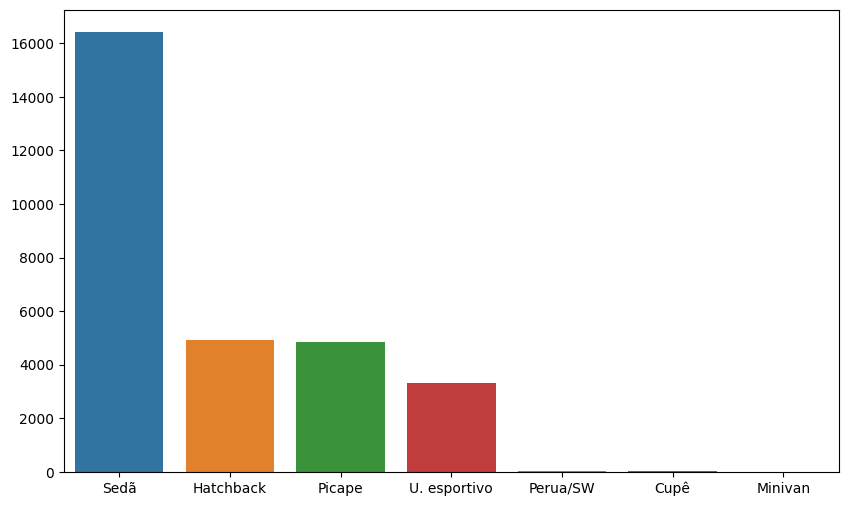

In [53]:
cars_labels = {'Sedã':16429, 'Hatchback':4924 ,'Picape':4849,'U. esportivo':3322, 'Perua/SW':27,'Cupê':26,'Minivan':7}
for i in cars_labels:
    print(i,':', cars_labels[i])
x_labels = list(cars_labels.keys())
y_values = list(cars_labels.values())
plt.figure(figsize=(10,6))
sns.barplot(x = x_labels, y = y_values)
plt.show()

In [54]:
cars_train[['cidade_vendedor','estado_vendedor']]

,cidade_vendedor,estado_vendedor
0,Rio de Janeiro,São Paulo (SP)
1,Belo Horizonte,Minas Gerais (MG)
2,Santos,São Paulo (SP)
3,Sorocaba,São Paulo (SP)
4,Rio de Janeiro,Rio de Janeiro (RJ)
...,...,...
29579,Goiânia,Goiás (GO)
29580,Medianeira,Paraná (PR)
29581,Luís Eduardo Magalhães,Bahia (BA)
29582,Rio de Janeiro,São Paulo (SP)


Informação redundante sobre o estado, irei considerar apenas a sigla.

In [55]:
cars_train['estado_vendedor'] = cars_train['estado_vendedor'].astype('str')
cars_train['estado_vendedor']

0             São Paulo (SP)
1          Minas Gerais (MG)
2             São Paulo (SP)
3             São Paulo (SP)
4        Rio de Janeiro (RJ)
                ...         
29579             Goiás (GO)
29580            Paraná (PR)
29581             Bahia (BA)
29582         São Paulo (SP)
29583         São Paulo (SP)
Name: estado_vendedor, Length: 29584, dtype: object

In [56]:
cars_train['estado_vendedor'] = cars_train['estado_vendedor'].str.split('(').str[1]


In [57]:
cars_train['estado_vendedor'] = cars_train['estado_vendedor'].str.replace(')','')

In [58]:
cars_train['estado_vendedor']

0        SP
1        MG
2        SP
3        SP
4        RJ
         ..
29579    GO
29580    PR
29581    BA
29582    SP
29583    SP
Name: estado_vendedor, Length: 29584, dtype: object

In [59]:
cars_train['tipo'].value_counts()

tipo
Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Cupê                       26
Minivan                     7
Name: count, dtype: int64

In [60]:
cars_train.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'preco'],
      dtype='object')

Vou tentar fazer um heatmap para tentar ver possiveis melhores correlacoes entre as colunas

In [61]:
cars_train[['marca','modelo','tipo','tipo_vendedor','estado_vendedor','preco']]

,marca,modelo,tipo,tipo_vendedor,estado_vendedor,preco
0,NISSAN,KICKS,Sedã,PF,SP,74732.590084
1,JEEP,COMPASS,Sedã,PF,MG,81965.332634
2,KIA,SORENTO,Sedã,PJ,SP,162824.814472
3,VOLKSWAGEN,AMAROK,Picape,PJ,SP,123681.358857
4,SSANGYONG,KORANDO,Utilitário esportivo,PF,RJ,82419.763891
...,...,...,...,...,...,...
29579,TOYOTA,HILUX,Picape,PF,GO,403015.289616
29580,VOLKSWAGEN,POLO,Picape,PF,PR,88978.080497
29581,TOYOTA,HILUX,Picape,PF,BA,218807.648664
29582,PEUGEOT,2008,Sedã,PJ,SP,68495.990693


#1 QUESTION
Qual o melhor estado cadastrado para vender um carro popular ? e Por quê?
para responder a primeira pergunta é preciso definir : o que é um carro popular? quais seus parâmetros?Picapes podem ser consideradas carros populares ?

In [62]:
cars_train['tipo'].value_counts()

tipo
Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Cupê                       26
Minivan                     7
Name: count, dtype: int64

In [63]:
cars_train[ (cars_train['tipo'] == 'Sedã') | (cars_train['tipo'] == 'Hatchback') ]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772.0,CVT,4,...,False,False,Não aceita troca,Mais que um dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979.0,Automática,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA pago,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070.0,Automática,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,162824.814472
5,304613157679868050200745320328901799358,13.0,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2017,2018,85314.0,Manual,4,...,True,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,51325.846909
6,230950713946761537603174928150249886929,14.0,HONDA,CIVIC,2.0 16V FLEXONE EX 4P CVT,2019,2019,27834.0,CVT,4,...,True,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,97366.800503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,216038596436207264898444653738013807549,16.0,JEEP,COMPASS,2.0 16V DIESEL LIMITED 4X4 AUTOMÁTICO,2020,2020,22979.0,Automática,4,...,True,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,260480.756299
29576,50444622273969638390701031731950884371,8.0,HYUNDAI,HB20S,1.0 12V FLEX VISION MANUAL,2021,2022,19932.0,Manual,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,85070.146565
29577,171243005660562031572040881005451244056,8.0,CHEVROLET,SPIN,1.8 PREMIER 8V FLEX 4P AUTOMÁTICO,2020,2021,39498.0,Automática,4,...,True,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,77503.980077
29578,274512509350044168285072928236726854633,8.0,HYUNDAI,HB20,1.0 12V FLEX EVOLUTION MANUAL,2021,2022,28784.0,Manual,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA pago,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,72797.548035


In [64]:
cars_train['cambio'].value_counts()

cambio
Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: count, dtype: int64

Automática : 22545
Manual : 4989
CVT : 1792
Automatizada : 139
Automatizada DCT : 53
Semi-automática : 41
Automática Sequencial : 25


<Axes: >

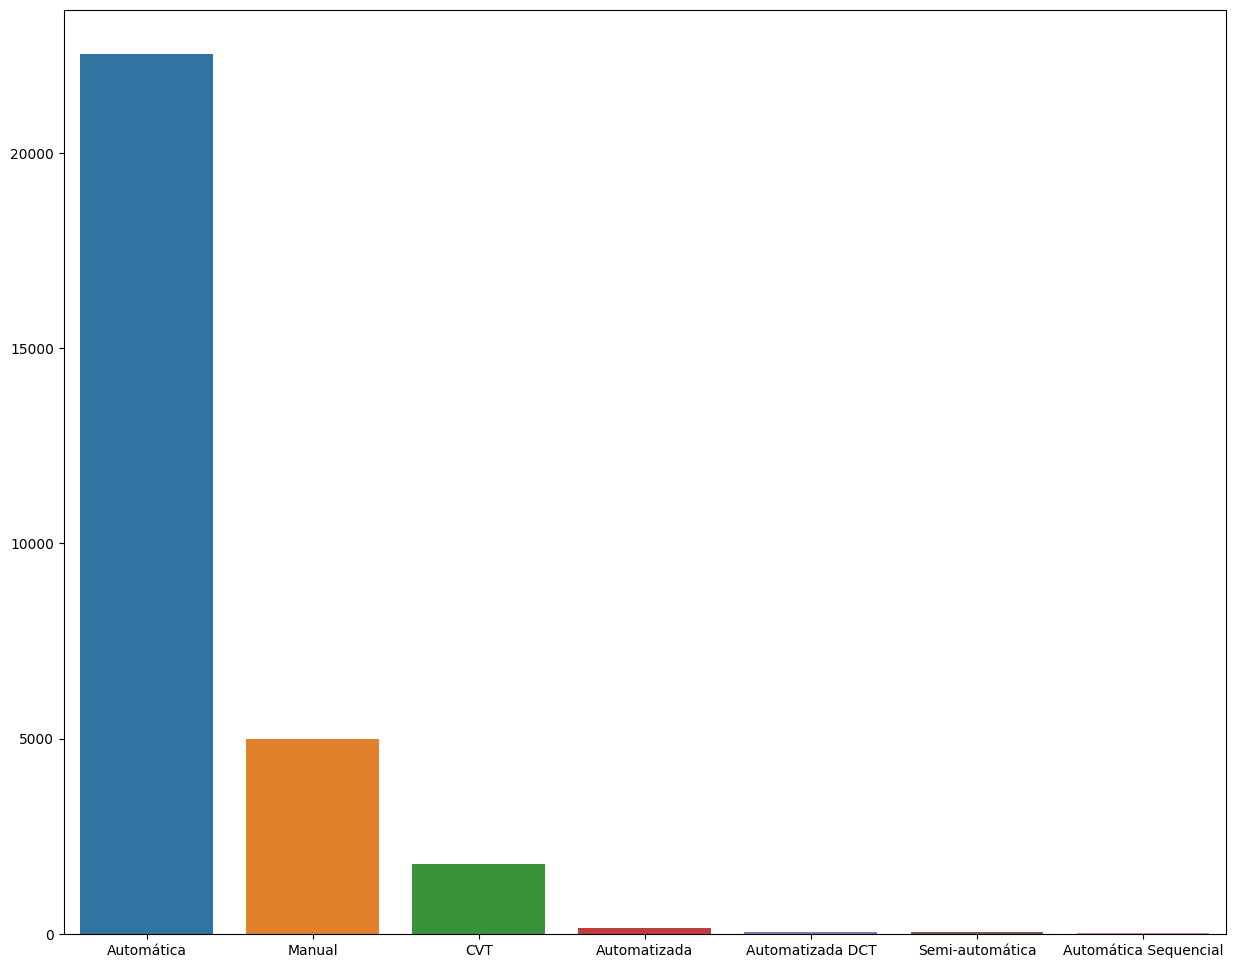

In [65]:
cars_transmission = {'Automática': 22545, 'Manual': 4989 ,'CVT': 1792,'Automatizada': 139, 'Automatizada DCT': 53,'Semi-automática': 41,'Automática Sequencial': 25}
for i in cars_transmission:
    print(i,':', cars_transmission[i])
x_labels_transmission = list(cars_transmission.keys())
y_values_transmission = list(cars_transmission.values())
plt.figure(figsize=(15,12))
sns.barplot(x = x_labels_transmission, y = y_values_transmission)

preferencia muito maior por carros automáticos

In [66]:
total_cells = np.product(cars_train['cambio'].shape)
cells_automatic = cars_train[cars_train['cambio'] == 'Automática']
cells_automatic = cells_automatic['cambio'].value_counts().values

percent_automatic = (cells_automatic/total_cells) * 100
print(percent_automatic)


[76.20673337]


Cerca de 76% preferem carro automático

In [67]:
cars_train['preco'].min()

9869.950645135155

media do preco dos carros

In [68]:
cars_train['preco'].mean()

133023.87988039522

Carro mais barato é um fusca 1992

In [69]:
cars_train[cars_train['preco'] == cars_train['preco'].min()]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
3930,301661037804328286615953008015027061532,8.0,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1992,2012,222321.0,Manual,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA pago,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,9869.950645


In [70]:
cars_train[cars_train['preco'] == cars_train['preco'].max()]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
9175,308503071796180546584015995459795952963,13.0,PORSCHE,911,3.0 24V H6 GASOLINA TARGA 4S PDK,2014,2017,10249.0,Automática,2,...,True,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,1.359813e+06


Optei por selecionar um carro de marca popular com as seguintes marcas: VOLKSWAGEN,CHEVROLET,TOYOTA,HYUNDAI,FIAT,PEUGEOT,FORD,RENAULT, HONDA,CITROËN,NISSAN e JEEP e fiz um recorte de preco da seguinte forma: peguei a media dos precos de veiculos de todos essas marcas especificadas e busco por um preco menor q a media (133 mil reais)

In [71]:
cars_train['marca'].value_counts()

marca
VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: count, dtype: int64

In [72]:
popular_cars = cars_train[(cars_train['preco'] < cars_train['preco'].mean()) & ((cars_train['marca'] == 'VOLKSWAGEN') | (cars_train['marca'] == 'CHEVROLET') | (cars_train['marca'] == 'TOYOTA') | (cars_train['marca'] == 'HYUNDAI') | (cars_train['marca'] == 'FIAT') | (cars_train['marca'] == 'PEUGEOT') | (cars_train['marca'] == 'FORD')| (cars_train['marca'] == 'RENAULT') | (cars_train['marca'] == 'HONDA') | (cars_train['marca'] == 'CITROËN') | (cars_train['marca'] == 'JEEP') | (cars_train['marca'] == 'NISSAN') )].sort_values('preco')

In [73]:
popular_cars

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
3930,301661037804328286615953008015027061532,8.0,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1992,2012,222321.0,Manual,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA pago,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,9869.950645
26359,226619116291182635743624724700616484456,8.0,PEUGEOT,307,1.6 PRESENCE SEDAN 16V FLEX 4P MANUAL,1998,2012,119731.0,Manual,4,...,False,False,Não aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,11606.398045
5497,301737368863860882436657500276489502131,8.0,PEUGEOT,207,1.4 XR SPORT 8V FLEX 4P MANUAL,1999,2013,128769.0,Manual,4,...,False,False,Não aceita troca,Mais que um dono,Todas as revisões feitas pela concessionária,IPVA pago,Sem licenciamento,Sem garantia de fábrica,Todas as revisões feitas pela agenda do carro,13576.401422
18200,279125074222685494207525095206614870117,15.0,FIAT,PALIO,1.0 MPI FIRE ECONOMY 8V FLEX 2P MANUAL,2008,2012,138482.0,Manual,4,...,True,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,13642.891063
16180,72843072145688843461062591189140131966,14.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2015,2015,86105.0,Manual,4,...,False,False,Aceita troca,Mais que um dono,Nem toda revisão foi feita em concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,14011.654277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,37241732177634212443143156468590080143,8.0,HONDA,HR-V,1.5 16V TURBO GASOLINA TOURING 4P AUTOMÁTICO,2019,2020,22130.0,CVT,4,...,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,132987.555249
16725,160208217750816593059322833589376551965,8.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2019,2019,67385.0,Automática,4,...,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,132993.219134
24546,67373495314892485719361757721262297339,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2019,2020,22749.0,Automática,4,...,False,False,Não aceita troca,Único dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,133007.934572
7842,308733009407931352086697517579781562940,15.0,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2018,2018,81399.0,Manual,4,...,False,False,Aceita troca,Único dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Sem garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,133012.868410


In [74]:
popular_cars[['estado_vendedor','marca']].value_counts()

estado_vendedor  marca     
SP               VOLKSWAGEN    1881
                 CHEVROLET     1293
                 HYUNDAI       1122
                 FIAT           848
                 HONDA          757
                               ... 
RN               TOYOTA           1
RO               PEUGEOT          1
                 VOLKSWAGEN       1
RR               CHEVROLET        1
TO               VOLKSWAGEN       1
Name: count, Length: 208, dtype: int64

In [75]:
popular_cars[['estado_vendedor','marca']]

,estado_vendedor,marca
3930,SC,VOLKSWAGEN
26359,SP,PEUGEOT
5497,SP,PEUGEOT
18200,SP,FIAT
16180,SP,FIAT
...,...,...
4192,SP,HONDA
16725,SC,VOLKSWAGEN
24546,SP,JEEP
7842,SP,HYUNDAI


In [76]:
popular_cars_state = popular_cars.groupby('estado_vendedor')['marca'].count().sort_values(ascending =  False)
popular_cars_state_df = popular_cars_state.to_frame(name = 'count')

In [77]:
popular_cars_state_df

,count
estado_vendedor,
SP,8530
RJ,1248
PR,1115
SC,1110
MG,858
RS,706
BA,334
GO,327
PE,187


In [78]:
count_brands_state = popular_cars.groupby(['estado_vendedor','marca']).size().reset_index(name = 'count')
brand_state = count_brands_state.groupby('estado_vendedor')['count'].idxmax()
brand_sells_most = count_brands_state.loc[brand_state]
print(brand_sells_most)
brand_sells_most = pd.DataFrame(brand_sells_most)

    estado_vendedor       marca  count
1                AC     CITROËN      4
17               AL  VOLKSWAGEN     23
19               AM        FIAT     16
26               BA   CHEVROLET     75
38               CE   CHEVROLET     12
47               ES   CHEVROLET      6
64               GO  VOLKSWAGEN     82
66               MA     PEUGEOT      4
78               MG  VOLKSWAGEN    175
80               MS        FIAT      9
90               MT     PEUGEOT      8
92               PA   CHEVROLET     11
98               PB   CHEVROLET     36
118              PE  VOLKSWAGEN     37
119              PI   CHEVROLET      1
132              PR  VOLKSWAGEN    201
133              RJ   CHEVROLET    254
145              RN   CHEVROLET     13
155              RO   CHEVROLET      2
158              RR   CHEVROLET      1
171              RS  VOLKSWAGEN    160
183              SC  VOLKSWAGEN    227
188              SE      TOYOTA      3
201              SP  VOLKSWAGEN   1881
202              TO   CHE

colocar em graficos os dois resultados acima:

VALUE COUNTS DA MARCA CITROEN COM O VALUE COUNTS

In [79]:
cars_train['num_fotos'].isnull().sum()

0

In [80]:
popular_cars[(popular_cars['estado_vendedor'] == 'AC')].value_counts()

id                                       num_fotos  marca       modelo     versao                                                     ano_de_fabricacao  ano_modelo  hodometro  cambio      num_portas  tipo       blindado  cor     tipo_vendedor  cidade_vendedor     estado_vendedor  anunciante  entrega_delivery  troca  elegivel_revisao  dono_aceita_troca  veiculo_único_dono  revisoes_concessionaria                       ipva_pago                              veiculo_licenciado  garantia_de_fábrica      revisoes_dentro_agenda                             preco        
103695132119301922153750722203156420514  8.0        TOYOTA      YARIS      1.3 16V FLEX XL MULTIDRIVE                                 2018               2018        77963.0    Automática  4           Hatchback  N         Branco  PJ             Canoinhas           AC               Loja        True              True   False             Aceita troca       Mais que um dono    Nem toda revisão foi feita em concessionária  IPVA não 

In [81]:
brand_sells_most

,estado_vendedor,marca,count
1,AC,CITROËN,4
17,AL,VOLKSWAGEN,23
19,AM,FIAT,16
26,BA,CHEVROLET,75
38,CE,CHEVROLET,12
47,ES,CHEVROLET,6
64,GO,VOLKSWAGEN,82
66,MA,PEUGEOT,4
78,MG,VOLKSWAGEN,175
80,MS,FIAT,9


In [82]:
cars_train[['cidade_vendedor','estado_vendedor']]

,cidade_vendedor,estado_vendedor
0,Rio de Janeiro,SP
1,Belo Horizonte,MG
2,Santos,SP
3,Sorocaba,SP
4,Rio de Janeiro,RJ
...,...,...
29579,Goiânia,GO
29580,Medianeira,PR
29581,Luís Eduardo Magalhães,BA
29582,Rio de Janeiro,SP


In [83]:
cars_train['estado_vendedor'].value_counts()

estado_vendedor
SP    16378
RJ     2548
PR     2526
SC     2302
MG     1775
RS     1646
GO      789
BA      604
PE      318
AL      125
PB      108
RN       90
PA       74
CE       69
AM       51
MS       35
MT       33
AC       29
SE       24
ES       21
TO       20
MA        7
PI        6
RO        4
RR        2
Name: count, dtype: int64

In [84]:
popular_cars_state_df.index

Index(['SP', 'RJ', 'PR', 'SC', 'MG', 'RS', 'BA', 'GO', 'PE', 'PB', 'AL', 'RN',
       'CE', 'AM', 'PA', 'MS', 'AC', 'ES', 'MT', 'TO', 'SE', 'MA', 'RO', 'PI',
       'RR'],
      dtype='object', name='estado_vendedor')

In [85]:
popular_cars_state_df.reset_index(inplace = True)


In [86]:
popular_cars_state_df

,estado_vendedor,count
0,SP,8530
1,RJ,1248
2,PR,1115
3,SC,1110
4,MG,858
5,RS,706
6,BA,334
7,GO,327
8,PE,187
9,PB,93


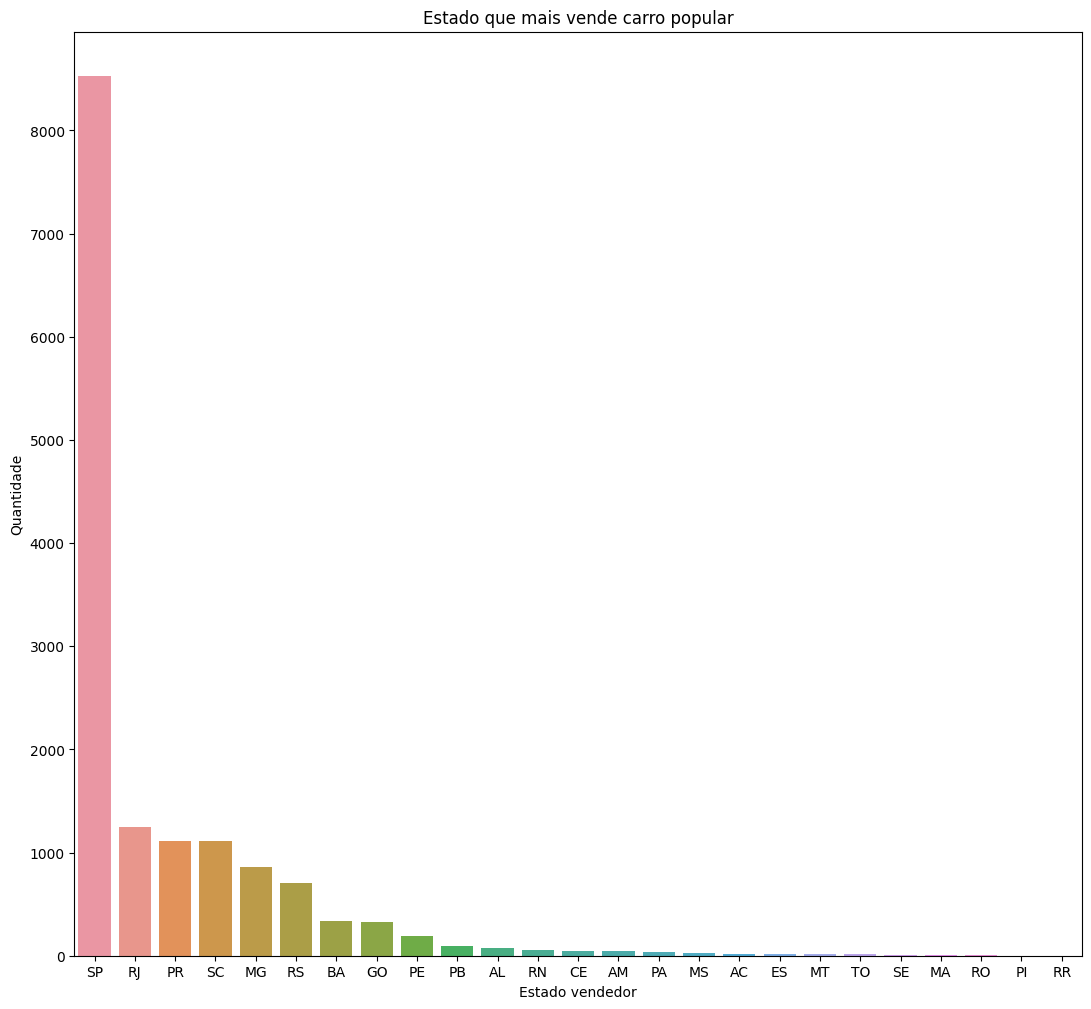

In [87]:
#popular_cars_state_df.reset_index(inplace = True)
plt.figure(figsize=(13,12))
sns.barplot(x = popular_cars_state_df['estado_vendedor'], y = popular_cars_state_df['count'])
plt.title("Estado que mais vende carro popular")
plt.xlabel("Estado vendedor")
plt.ylabel("Quantidade")
plt.show()

In [88]:
brand_sells_most

,estado_vendedor,marca,count
1,AC,CITROËN,4
17,AL,VOLKSWAGEN,23
19,AM,FIAT,16
26,BA,CHEVROLET,75
38,CE,CHEVROLET,12
47,ES,CHEVROLET,6
64,GO,VOLKSWAGEN,82
66,MA,PEUGEOT,4
78,MG,VOLKSWAGEN,175
80,MS,FIAT,9


In [89]:
pivot_df = brand_sells_most.pivot(index = 'estado_vendedor',columns = 'marca',values = 'count')

<Axes: xlabel='marca', ylabel='estado_vendedor'>

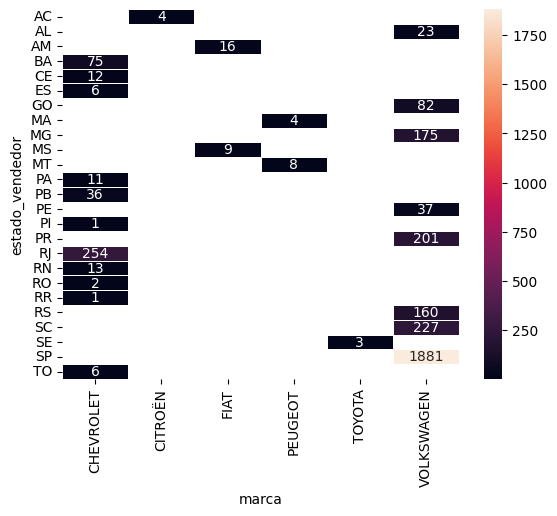

In [90]:

sns.heatmap(data = pivot_df, annot = True,fmt = ".0f" ,linewidths= 0.5)

++++++++++++++++++++++++++++++++++++++

QUESTION #2 : Qual o melhor estado pra comprar picape com transmissao automatica? e Por quê ?

Olhando agora da perspectiva de quem está comprando uma picape, eu terei que olhar o de menor preco!

#1 filtra entre todo o nosso universo: no caso somente as picapes

In [91]:
picapes  = cars_train[cars_train['tipo'] == 'Picape']

In [92]:
picapes_automatic = picapes[picapes['cambio'] == 'Automática']

In [93]:
picapes_automatic = picapes_automatic[['marca','modelo','estado_vendedor', 'tipo', 'cambio','preco']].sort_values(by = 'preco',ascending = True)

In [94]:
picapes_automatic

,marca,modelo,estado_vendedor,tipo,cambio,preco
7696,VOLKSWAGEN,NEW BEETLE,SP,Picape,Automática,1.595320e+04
28497,TOYOTA,ETIOS,SP,Picape,Automática,2.566465e+04
24028,HYUNDAI,VELOSTER,RJ,Picape,Automática,2.672972e+04
4658,DODGE,DAKOTA,SP,Picape,Automática,2.932715e+04
690,VOLKSWAGEN,GOL,PR,Picape,Automática,3.347473e+04
...,...,...,...,...,...,...
5522,PORSCHE,718,SP,Picape,Automática,9.447675e+05
6846,BMW,Z4,SP,Picape,Automática,9.668446e+05
21827,PORSCHE,718,SP,Picape,Automática,1.028431e+06
2271,RAM,2500,SP,Picape,Automática,1.154360e+06


In [95]:
picapes_automatic.columns

Index(['marca', 'modelo', 'estado_vendedor', 'tipo', 'cambio', 'preco'], dtype='object')

In [96]:
picapes_automatic[['marca','estado_vendedor','tipo', 'preco']]

,marca,estado_vendedor,tipo,preco
7696,VOLKSWAGEN,SP,Picape,1.595320e+04
28497,TOYOTA,SP,Picape,2.566465e+04
24028,HYUNDAI,RJ,Picape,2.672972e+04
4658,DODGE,SP,Picape,2.932715e+04
690,VOLKSWAGEN,PR,Picape,3.347473e+04
...,...,...,...,...
5522,PORSCHE,SP,Picape,9.447675e+05
6846,BMW,SP,Picape,9.668446e+05
21827,PORSCHE,SP,Picape,1.028431e+06
2271,RAM,SP,Picape,1.154360e+06


In [97]:
picapes_automatic['tipo'].value_counts()

tipo
Picape    3300
Name: count, dtype: int64

In [98]:
picapes_automatic_idx = picapes_automatic.groupby('estado_vendedor')['preco'].idxmin()
cars_low = picapes_automatic.loc[picapes_automatic_idx,['marca','modelo','estado_vendedor','preco']]

In [99]:
picapes_automatic[picapes_automatic['estado_vendedor'] == 'BA'].sort_values(by = 'preco')

,marca,modelo,estado_vendedor,tipo,cambio,preco
21460,FIAT,TORO,BA,Picape,Automática,61529.782003
17060,FIAT,TORO,BA,Picape,Automática,70160.323332
16634,FIAT,TORO,BA,Picape,Automática,79672.336101
15665,FIAT,TORO,BA,Picape,Automática,84633.363649
17202,HONDA,FIT,BA,Picape,Automática,89232.641430
...,...,...,...,...,...,...
23420,FORD,RANGER,BA,Picape,Automática,335490.906772
7320,BMW,Z4,BA,Picape,Automática,345435.078334
20035,TOYOTA,HILUX,BA,Picape,Automática,364380.787776
24949,TOYOTA,HILUX,BA,Picape,Automática,372539.481432


In [100]:
picapes_automatic[(picapes_automatic['estado_vendedor'] == 'SE')].sort_values(by = 'preco',ascending = True)

,marca,modelo,estado_vendedor,tipo,cambio,preco
25085,TOYOTA,HILUX,SE,Picape,Automática,233540.340367
19862,CHEVROLET,S10,SE,Picape,Automática,236291.695247
1889,BMW,745Le,SE,Picape,Automática,292493.757273
7385,TOYOTA,HILUX SW4,SE,Picape,Automática,328272.278075
5781,TOYOTA,HILUX,SE,Picape,Automática,400378.477403


In [101]:
cars_low.sort_values(by = 'preco')

,marca,modelo,estado_vendedor,preco
7696,VOLKSWAGEN,NEW BEETLE,SP,15953.204811
24028,HYUNDAI,VELOSTER,RJ,26729.716235
690,VOLKSWAGEN,GOL,PR,33474.730405
8534,TOYOTA,HILUX,RS,40222.467536
29027,VOLKSWAGEN,GOLF,SC,41524.669174
26323,MITSUBISHI,L200 TRITON,MS,51084.109261
17108,VOLKSWAGEN,POLO,AL,52207.250003
14355,CITROËN,DS5,AC,56452.605869
23393,CHEVROLET,ONIX,MG,58014.160096
21460,FIAT,TORO,BA,61529.782003


In [102]:
cars_low = pd.DataFrame(cars_low)
#type(best_state)

In [103]:
cars_low.reset_index(inplace= True)

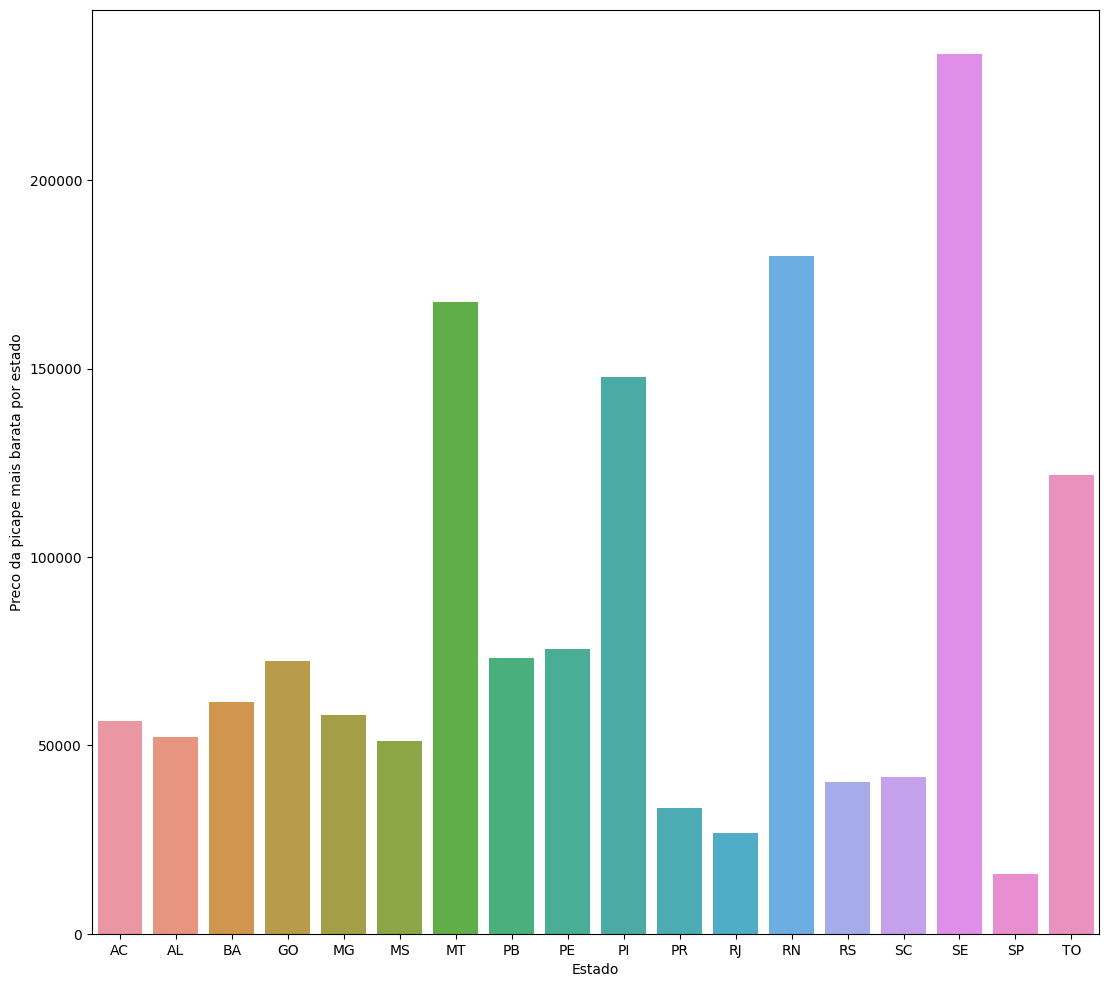

In [104]:
plt.figure(figsize=(13,12))
sns.barplot(x = cars_low['estado_vendedor'], y = cars_low['preco'])
#plt.title("Estado que mais vende carro popular")
plt.xlabel("Estado")
plt.ylabel("Preco da picape mais barata por estado")
plt.show()

Com isso vemos que o Estado mais barato para se comprar uma picape com transmissão automática é o estado de SP com o valor de 15953.204811 reais da marca VW, seguido do RJ com 26729.716235 reais da marca HYUNDAI

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

QUESTION #3: Qual o melhor estado para comprar carros que ainda estejam na garantia de fábrica
Primeiro é necessario filtrar no df original quais veículos ainda tem garantia de fábrica. Após isso, o melhor estado será aquela q tiver o menor preço

In [105]:
cars_train.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'preco'],
      dtype='object')

In [106]:
cars_train['garantia_de_fábrica'].value_counts()

garantia_de_fábrica
Sem garantia de fábrica    25219
Garantia de fábrica         4365
Name: count, dtype: int64

In [107]:
cars_in_warranty = cars_train[cars_train['garantia_de_fábrica'] == 'Garantia de fábrica']
cars_in_warranty

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491.0,Automática,4,...,False,False,Não aceita troca,Mais que um dono,Todas as revisões feitas pela concessionária,IPVA não foi pago ou não foi inforado,Sem licenciamento,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82419.763891
8,27193355972239090268287282344066791959,8.0,VOLKSWAGEN,UP,1.0 TSI HIGH UP 12V FLEX 4P MANUAL,2017,2018,39987.0,Manual,4,...,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,75088.721909
17,22623637632558238619093107555320587591,8.0,VOLKSWAGEN,POLO,1.0 200 TSI COMFORTLINE AUTOMÁTICO,2019,2019,35346.0,Automática,4,...,False,False,Não aceita troca,Único dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,52375.520054
19,118295225597332705218254827343258102397,8.0,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,2021,2022,7277.0,Manual,4,...,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,148360.043101
21,161689246994150584328334702158353189075,8.0,PORSCHE,CAYENNE,3.0 V6 GASOLINA AWD TIPTRONIC S,2020,2020,8220.0,Automática,4,...,False,False,Aceita troca,Mais que um dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,377512.644518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29564,7153831053306885937235229425685159881,8.0,VOLKSWAGEN,GOL,1.6 16V MSI TOTALFLEX 4P AUTOMÁTICO,2021,2021,21166.0,Automática,4,...,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,199455.691489
29566,264948049948751322976294662307060386869,8.0,FIAT,STRADA,1.3 FIREFLY FLEX FREEDOM CS MANUAL,2021,2022,2596.0,Manual,4,...,False,False,Não aceita troca,Único dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,92239.274399
29567,148783390470394554026358945089096197309,8.0,JEEP,RENEGADE,1.8 16V FLEX 4P AUTOMÁTICO,2019,2020,31095.0,Automática,4,...,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,55604.999913
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150.0,Automática,4,...,False,False,Aceita troca,Único dono,Nem toda revisão foi feita em concessionária,IPVA pago,Licenciado,Garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,403015.289616


In [108]:
warranty_cars_idx = cars_in_warranty.groupby('estado_vendedor')['preco'].idxmin()
warranty_low = cars_in_warranty.loc[warranty_cars_idx,['marca','modelo','estado_vendedor','preco']]
warranty_low

,marca,modelo,estado_vendedor,preco
3421,HYUNDAI,HB20,AC,72811.745577
20493,PEUGEOT,208,AL,55178.097786
14413,TOYOTA,YARIS,AM,54908.191330
12966,VOLKSWAGEN,POLO,BA,33100.914663
3981,PEUGEOT,2008,CE,123939.878795
21534,HYUNDAI,ELANTRA,ES,49919.575982
27939,VOLKSWAGEN,GOL,GO,45812.306967
1930,MITSUBISHI,LANCER,MG,29906.894268
21675,FIAT,STRADA,MS,85730.862915
19842,BMW,Z4,MT,178934.006888


In [109]:
warranty_low.sort_values(by = 'preco')

,marca,modelo,estado_vendedor,preco
6101,PEUGEOT,307,PR,29328.116594
1930,MITSUBISHI,LANCER,MG,29906.894268
7492,PEUGEOT,307,SP,31763.159542
12966,VOLKSWAGEN,POLO,BA,33100.914663
5426,AUDI,A6,RJ,39556.398656
25494,CHEVROLET,MONTANA,PA,43906.629995
5427,VOLKSWAGEN,GOL,SC,44004.769748
27939,VOLKSWAGEN,GOL,GO,45812.306967
21534,HYUNDAI,ELANTRA,ES,49919.575982
20071,NISSAN,KICKS,RS,54742.833352


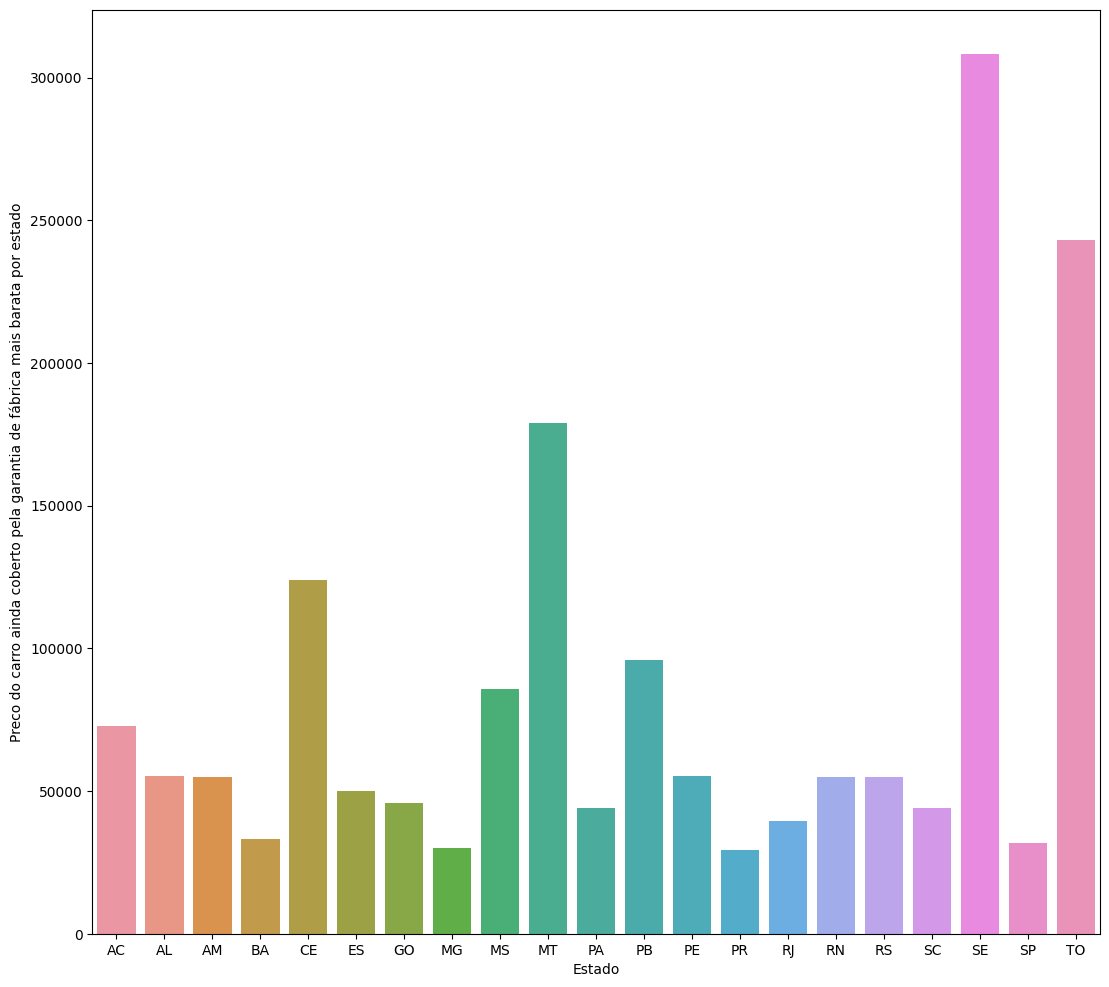

In [110]:
plt.figure(figsize=(13,12))
sns.barplot(x = warranty_low['estado_vendedor'], y = warranty_low['preco'])
#plt.title("Estado que mais vende carro popular")
plt.xlabel("Estado")
plt.ylabel("Preco do carro ainda coberto pela garantia de fábrica mais barata por estado")
plt.show()

Logo, vemos que o estado com o preco mais barato de um carro que ainda é coberto pela garantia de fábrica é o PR com o valor de 29328.116594 reais com o modelo PEUGEOT	307, seguido de MG com o valor de 29906.894268 reais com o modelo MITSUBISHI	LANCER.

# EXERCÍCIO DE REGRESSÃO

Temos como alvo-ou seja, o que estamos querendo prever- o preço do carro em questão.

In [111]:
y = cars_train['preco']
y

0         74732.590084
1         81965.332634
2        162824.814472
3        123681.358857
4         82419.763891
             ...      
29579    403015.289616
29580     88978.080497
29581    218807.648664
29582     68495.990693
29583    132507.873187
Name: preco, Length: 29584, dtype: float64

In [112]:
cars_train.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'preco'],
      dtype='object')

In [113]:
data_types = cars_train.dtypes
print(data_types)

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                   int64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
preco                      float64
dtype: object


In [152]:
cars_train['cambio'].value_counts()

cambio
Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: count, dtype: int64

In [146]:
cars_train['revisoes_concessionaria'].value_counts()

revisoes_concessionaria
Nem toda revisão foi feita em concessionária    20412
Todas as revisões feitas pela concessionária     9172
Name: count, dtype: int64

In [141]:
cars_train['revisoes_dentro_agenda'].value_counts()

revisoes_dentro_agenda
Nem todas as revisões feitas pela agenda do carro    23674
Todas as revisões feitas pela agenda do carro         5910
Name: count, dtype: int64

In [137]:
cars_train['garantia_de_fábrica'].value_counts()

garantia_de_fábrica
Sem garantia de fábrica    25219
Garantia de fábrica         4365
Name: count, dtype: int64

In [114]:
cars_train['dono_aceita_troca'].value_counts()

dono_aceita_troca
Aceita troca        21922
Não aceita troca     7662
Name: count, dtype: int64

In [128]:
cars_train['tipo'].value_counts()

tipo
Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Cupê                       26
Minivan                     7
Name: count, dtype: int64

In [132]:
cars_train['ipva_pago'].value_counts()

ipva_pago
IPVA pago                                19659
IPVA não foi pago ou não foi inforado     9925
Name: count, dtype: int64

Em busca de obter features melhores, irei fazer uma mudança de variáveis em algumas colunas do dataset para melhorar o modelo de regressão, caso o dono aceite troca substitui por 1 e caso não aceite, usa 0

In [115]:
cars_train['dono_aceita_troca'].replace({'Aceita troca': 1, 'Não aceita troca': 0},inplace = True)

A mesma mudança será feita na coluna veiculo_licenciado onde se o veiculo for licenciado: 1, se tiver sem licenciamento: 0

In [119]:
cars_train['veiculo_licenciado'].replace({'Licenciado':1,'Sem licenciamento': 0},inplace = True)

In [124]:
cars_train['veiculo_único_dono'].replace({'Único dono': 1,'Mais que um dono': 0},inplace = True)

O mesmo raciocínio para a coluna veiculo_unico_dono. 1: Unico dono e 0: Mais que um dono

In [125]:
cars_train['veiculo_único_dono'].value_counts()

veiculo_único_dono
0    19161
1    10423
Name: count, dtype: int64

In [120]:
cars_train['veiculo_licenciado'].value_counts()

veiculo_licenciado
1    15906
0    13678
Name: count, dtype: int64

A mesma transformação para a coluna do tipo do carro

In [129]:
cars_train['tipo'].replace({'Sedã': 1, 'Hatchback': 2, 'Picape': 3, 'Utilitário esportivo':4,'Perua/SW':5, 'Cupê':6,'Minivan': 7},inplace = True)

Fazendo a transformacao para o tipo numérico da coluna 'ipva_pago'

In [134]:
cars_train['ipva_pago'].replace({'IPVA pago': 1, 'IPVA não foi pago ou não foi inforado': 0},inplace = True)

Para a coluna garantia de fabrica

In [138]:
cars_train['garantia_de_fábrica'].replace({'Garantia de fábrica': 1, 'Sem garantia de fábrica': 0},inplace = True)

Para a coluna revisoes_dentro_agenda

In [147]:
cars_train['revisoes_dentro_agenda'].value_counts()

revisoes_dentro_agenda
0    23674
1     5910
Name: count, dtype: int64

In [144]:
cars_train['revisoes_dentro_agenda'].replace({'Nem todas as revisões feitas pela agenda do carro':0, 'Todas as revisões feitas pela agenda do carro': 1},inplace = True)

para a coluna 'revisoes_concessionaria'

In [149]:
cars_train['revisoes_concessionaria'].replace({'Nem toda revisão foi feita em concessionária': 0, 'Todas as revisões feitas pela concessionária': 1},inplace = True)

In [153]:
cars_train['cambio'].value_counts()

cambio
Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: count, dtype: int64

Para o cambio enumerei de 1 a 7

In [154]:
cars_train['cambio'].replace({'Automática': 1, 'Manual': 2, 'CVT': 3, 'Automatizada':4,'Automatizada DCT':5,'Semi-automática': 6, 'Automática Sequencial': 7},inplace = True)

### ++++++++++++

In [155]:
X = cars_train[['num_fotos','ano_de_fabricacao','ano_modelo','hodometro','num_portas','dono_aceita_troca','veiculo_licenciado','veiculo_único_dono','tipo','cambio','ipva_pago','garantia_de_fábrica','revisoes_dentro_agenda', 'revisoes_concessionaria']]

In [156]:
X

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_licenciado,veiculo_único_dono,tipo,cambio,ipva_pago,garantia_de_fábrica,revisoes_dentro_agenda,revisoes_concessionaria
0,8.0,2017,2017,67772.0,4,0,1,0,1,3,1,0,0,1
1,8.0,2017,2017,62979.0,4,1,0,0,1,1,1,0,0,0
2,16.0,2018,2019,44070.0,4,1,0,0,1,1,0,0,0,0
3,14.0,2013,2015,85357.0,4,1,1,0,3,1,1,0,0,0
4,8.0,2013,2015,71491.0,4,0,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,8.0,2021,2021,8150.0,4,1,1,1,3,1,1,1,0,0
29580,8.0,2020,2020,17987.0,4,0,1,1,3,1,1,1,0,1
29581,8.0,2019,2019,44742.0,4,1,0,0,3,1,0,0,0,0
29582,8.0,2021,2022,35376.0,4,1,1,1,1,1,1,0,0,0


Uma matriz de correlação

In [158]:
corr_Matrix = X.corr()
corr_Matrix_df = pd.DataFrame(corr_Matrix)
print(corr_Matrix)

                         num_fotos  ano_de_fabricacao  ano_modelo  hodometro  \
num_fotos                 1.000000           0.012987    0.010250   0.039837   
ano_de_fabricacao         0.012987           1.000000    0.860315  -0.728288   
ano_modelo                0.010250           0.860315    1.000000  -0.790062   
hodometro                 0.039837          -0.728288   -0.790062   1.000000   
num_portas                0.007924           0.080988    0.074566  -0.055628   
dono_aceita_troca         0.373745          -0.055974   -0.037876   0.103477   
veiculo_licenciado       -0.186283           0.096303    0.126301  -0.113801   
veiculo_único_dono       -0.125808           0.418130    0.508765  -0.441053   
tipo                     -0.011078           0.041053    0.026110  -0.061905   
cambio                   -0.059595           0.016266    0.034670   0.007346   
ipva_pago                -0.341290           0.089500    0.110045  -0.104358   
garantia_de_fábrica      -0.200277      

In [159]:
corr_Matrix_df

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_licenciado,veiculo_único_dono,tipo,cambio,ipva_pago,garantia_de_fábrica,revisoes_dentro_agenda,revisoes_concessionaria
num_fotos,1.000000,0.012987,0.010250,0.039837,0.007924,0.373745,-0.186283,-0.125808,-0.011078,-0.059595,-0.341290,-0.200277,-0.286082,-0.290974
ano_de_fabricacao,0.012987,1.000000,0.860315,-0.728288,0.080988,-0.055974,0.096303,0.418130,0.041053,0.016266,0.089500,0.306202,0.001269,0.042522
ano_modelo,0.010250,0.860315,1.000000,-0.790062,0.074566,-0.037876,0.126301,0.508765,0.026110,0.034670,0.110045,0.386208,-0.013472,0.029027
hodometro,0.039837,-0.728288,-0.790062,1.000000,-0.055628,0.103477,-0.113801,-0.441053,-0.061905,0.007346,-0.104358,-0.460309,-0.111138,-0.171897
num_portas,0.007924,0.080988,0.074566,-0.055628,1.000000,-0.025890,0.015947,0.019934,-0.190418,-0.051815,0.013377,0.025900,0.006146,0.011903
dono_aceita_troca,0.373745,-0.055974,-0.037876,0.103477,-0.025890,1.000000,-0.268890,-0.354472,0.033410,-0.145187,-0.336231,-0.391509,-0.412858,-0.450526
veiculo_licenciado,-0.186283,0.096303,0.126301,-0.113801,0.015947,-0.268890,1.000000,0.389871,-0.043565,0.027987,0.743103,0.168251,0.113686,0.206044
veiculo_único_dono,-0.125808,0.418130,0.508765,-0.441053,0.019934,-0.354472,0.389871,1.000000,-0.004346,0.082420,0.372234,0.524574,0.262247,0.340648
tipo,-0.011078,0.041053,0.026110,-0.061905,-0.190418,0.033410,-0.043565,-0.004346,1.000000,-0.018194,-0.037121,0.073876,0.046724,0.065447
cambio,-0.059595,0.016266,0.034670,0.007346,-0.051815,-0.145187,0.027987,0.082420,-0.018194,1.000000,0.047589,0.052278,0.023992,0.019007


#### Uma vez que após fazer o plot do matriz de correlação, é observado que muitas das features estão em escala diferente, logo é necessário fazer a normalização dos dados

In [163]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
#como o x_normalized retorn um numpy_array, retorno para o tipo df
X_normalized_df = pd.DataFrame(X_normalized,columns = X.columns)
print(X_normalized_df)

       num_fotos  ano_de_fabricacao  ano_modelo  hodometro  num_portas  \
0       0.380952           0.864865    0.769231   0.173534         1.0   
1       0.380952           0.864865    0.769231   0.161243         1.0   
2       0.761905           0.891892    0.846154   0.112754         1.0   
3       0.666667           0.756757    0.692308   0.218627         1.0   
4       0.380952           0.756757    0.692308   0.183070         1.0   
...          ...                ...         ...        ...         ...   
29579   0.380952           0.972973    0.923077   0.020643         1.0   
29580   0.380952           0.945946    0.884615   0.045868         1.0   
29581   0.380952           0.918919    0.846154   0.114477         1.0   
29582   0.380952           0.972973    0.961538   0.090459         1.0   
29583   0.666667           0.837838    0.769231   0.231644         1.0   

       dono_aceita_troca  veiculo_licenciado  veiculo_único_dono      tipo  \
0                    0.0         

In [164]:
X_normalized_df

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_licenciado,veiculo_único_dono,tipo,cambio,ipva_pago,garantia_de_fábrica,revisoes_dentro_agenda,revisoes_concessionaria
0,0.380952,0.864865,0.769231,0.173534,1.0,0.0,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,1.0
1,0.380952,0.864865,0.769231,0.161243,1.0,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0
2,0.761905,0.891892,0.846154,0.112754,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.666667,0.756757,0.692308,0.218627,1.0,1.0,1.0,0.0,0.333333,0.000000,1.0,0.0,0.0,0.0
4,0.380952,0.756757,0.692308,0.183070,1.0,0.0,0.0,0.0,0.500000,0.000000,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,0.380952,0.972973,0.923077,0.020643,1.0,1.0,1.0,1.0,0.333333,0.000000,1.0,1.0,0.0,0.0
29580,0.380952,0.945946,0.884615,0.045868,1.0,0.0,1.0,1.0,0.333333,0.000000,1.0,1.0,0.0,1.0
29581,0.380952,0.918919,0.846154,0.114477,1.0,1.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0
29582,0.380952,0.972973,0.961538,0.090459,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0


#### k-NN(k-Nearest Neighbors)

Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset - its nearest neighbors

create a train and a test dataset

k-NN as a regressor returns the mean of the nearest K neighbors

In [120]:
y

0         74732.590084
1         81965.332634
2        162824.814472
3        123681.358857
4         82419.763891
             ...      
29579    403015.289616
29580     88978.080497
29581    218807.648664
29582     68495.990693
29583    132507.873187
Name: preco, Length: 29584, dtype: float64

In [121]:
cars_train['preco']

0         74732.590084
1         81965.332634
2        162824.814472
3        123681.358857
4         82419.763891
             ...      
29579    403015.289616
29580     88978.080497
29581    218807.648664
29582     68495.990693
29583    132507.873187
Name: preco, Length: 29584, dtype: float64

Verificando se o dataset é muito desbalanceado

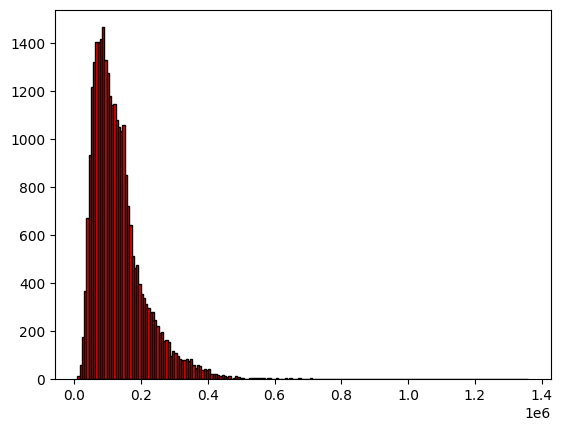

In [194]:
plt.hist(y, bins = 200, color = 'red',edgecolor = 'black')
plt.show()

### Utilizando a abordagem k-NN
#### Estamos resolvendo um problema de regressão porque o objetivo é predizer (ou estimar) um número, no nosso caso, o valor de preços de carros

Vemos que o dataset não é desbalanceado, visto que tem uma certa convergência entre 0.0 e 0.2

Optei pela métrica Root Mean Squared Error muito comum para avaliar modelos de regressão,e que mede a diferença entre os valores preditos e os valores reais. Ela tem como principal benefício ser sensível a erros. Optei pela abordagem do k-NN por se tratar de um algoritmo simples e muito utilizado.

In [194]:
X_train , X_test,y_train, y_test = train_test_split(X_normalized_df,y,test_size = 0.25, random_state= 42)

#inicialmente irei colocar 5 vizinhos
k = 10
knn_model = KNeighborsRegressor(n_neighbors=k)
#fazer o fit do modelo, ou seja, treinar o modelo com o dado de treino
knn_model.fit(X_train,y_train)

#fazer as previsões
y_pred = knn_model.predict(X_test)

#calcular o RMSE para avaliar a performance
rmse = np.sqrt(mean_absolute_error(y_test,y_pred))

print("RMSE", rmse)

RMSE 200.84206304368854


In [197]:
y_pred

array([134951.71540129, 111998.29574674, 131114.73215435, ...,
       190456.4717552 ,  96101.95612826, 156348.59526991])

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

param_grid = {
    'n_neighbors': [1, 3, 5, 7,10, 15, 20, 30, 50],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
knn_model = KNeighborsRegressor()

#performa um gridsearch
grid_search = GridSearchCV(estimator = knn_model, param_grid = param_grid,scoring ='neg_mean_squared_error',cv = 5 )
grid_search.fit(X_train,y_train)

# Step 5: Get the best hyperparameters from grid search
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_p = grid_search.best_params_['p']

best_knn_model = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights, p=best_p)

best_knn_model.fit(X_train, y_train)

# Step 8: Make predictions on the testing data
y_pred = best_knn_model.predict(X_test)

# Step 9: Calculate the RMSE to evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best k:", best_k)
print("Best weights:", best_weights)
print("Best p:", best_p)
print("Root Mean Squared Error (RMSE):", rmse)

Best k: 50
Best weights: distance
Best p: 1
Root Mean Squared Error (RMSE): 74147.03914778012


In [198]:
y_true = cars_train['preco']

In [206]:
y_pred_df = pd.DataFrame(y_pred,columns = ['Preco'])
id_column = cars_train['id']
final_df = pd.concat([id_column.reset_index(drop = True),y_pred_df],axis = 1)
print(final_df)

                                            id          Preco
0      300716223898539419613863097469899222392  134951.715401
1      279639842134129588306469566150288644214  111998.295747
2       56414460810621048900295678236538171981  131114.732154
3       56862509826849933428086372390159405545  335944.045129
4      338980975753200343894519909855598027197  125695.504228
...                                        ...            ...
29579   40985083650499509711752444068313401704            NaN
29580  164663177589009976281210123914772747797            NaN
29581  170866287186047465472146212778882034162            NaN
29582  208909739337040262669325459666578363437            NaN
29583  171781413417552881896009715888472310172            NaN

[29584 rows x 2 columns]


In [208]:
final_df['Preco'].mean()

132685.84382994365

In [209]:
cars_train['preco'].mean()

133023.87988039522

Vemos que o modelo tem um bom grau de previsão visto que a média do modelo original da coluna 'preco' é de 133023.87988039522, e da coluna que foi predita é de 132685.84382994365.

In [210]:
final_df.to_csv("predicted.csv",index = False)

print("DataFrame salvo com sucesso")

DataFrame salvo com sucesso
